# Ridge & Lasso Regression 解决线性回归的Overfitting 多度拟合

## 
Ridge算法和lasso算法都是线性回归的正则化方法。它们都通过在损失函数中添加惩罚项来防止过拟合。Ridge算法在损失函数中添加L2正则化项，而lasso算法在损失函数中添加L1正则化项¹。

这两种方法的主要区别在于，当惩罚参数足够大时，lasso算法可以将某些系数压缩到0，从而实现变量选择¹。这意味着lasso算法可以得到一个稀疏模型，只包含部分变量，更容易解释²。而Ridge算法不会将系数压缩到0，最终模型始终包括所有变量²。

从贝叶斯角度看，lasso（L1正则）等价于参数w的先验概率分布满足拉普拉斯分布，而ridge（L2正则）等价于参数w的先验概率分布满足高斯分布³。

至于哪种方法的预测精度更高，则不一定。它们在性质上是相似的：随着惩罚参数增大，方差减小而偏差平方和增大，所以测试均方误差随之波动²。具体哪种方法更好需要根据实际情况进行比较。

源: 与必应的对话， 2023/9/8
(1) 图文解释LASSO和Ridge回归的区别 - 知乎. https://zhuanlan.zhihu.com/p/353418999.
(2) L1(lasso)和L2(ridge)正则化的原理及差异 - 知乎. https://zhuanlan.zhihu.com/p/50639490.
(3) 线性回归——lasso回归和岭回归（ridge regression .... https://www.cnblogs.com/wuliytTaotao/p/10837533.html.
(4) 正则化是什么？以及Ridge和 Lasso回归的区别 - 知乎. https://zhuanlan.zhihu.com/p/111562068.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

In [2]:
boston = load_boston()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [3]:
X = pd.DataFrame(boston['data'])

In [4]:
X.columns = boston["feature_names"]

In [5]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [6]:
Y = boston.target

In [7]:
Y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

## Linear Regression

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score   #cross validation

linregressor = LinearRegression()
cvscore = cross_val_score(linregressor,X,Y,cv=5)

In [9]:
cvscore

array([ 0.63919994,  0.71386698,  0.58702344,  0.07923081, -0.25294154])

In [10]:
mean_score = np.mean(cvscore)

## Ridge Regression 加入多个parameters多个备选参数由算法决定最佳调参

In [11]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-4,1e-2,1,5,8,10,20,40,80,160,200,240,280,320,500,1000]}
ridgeregressor=GridSearchCV(ridge,parameters,cv=5)
ridgeregressor.fit(X,Y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.01, 1, 5, 8,
                                   10, 20, 40, 80, 160, 200, 240, 280, 320, 500,
                                   1000]})

In [12]:
print(ridgeregressor.best_params_)
print(ridgeregressor.best_score_)

{'alpha': 160}
0.49810493235321635


## Ridge Regression 算法决定最佳调参后再进一步细化

In [13]:
parameters={'alpha':[150,155,160,165,170,175,180,185,190,195,200]}  #将参数范围精细化
ridgeregressor=GridSearchCV(ridge,parameters,cv=5)
ridgeregressor.fit(X,Y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [150, 155, 160, 165, 170, 175, 180, 185, 190,
                                   195, 200]})

In [14]:
print(ridgeregressor.best_params_)
print(ridgeregressor.best_score_)

{'alpha': 175}
0.4982450471237211


## Lasso Regression

In [15]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso = Lasso()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-4,1e-2,1,5,8,10,20,40,80,160,200,240,280,320,500,1000]}
lassoregressor = GridSearchCV(lasso,parameters,cv=5)

lassoregressor.fit(X,Y)
print(lassoregressor.best_params_)
print(lassoregressor.best_score_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.431e+03, tolerance: 3.919e+00
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.397e+03, tolerance: 3.307e+00
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.797e+03, toleranc

{'alpha': 1}
0.431848787926522


In [16]:
import seaborn as sns

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=0)

In [18]:
prediction_lasso = lassoregressor.predict(x_test)
prediction_ridge = ridgeregressor.predict(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

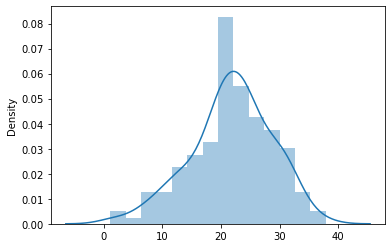

In [19]:
sns.distplot(prediction_lasso)